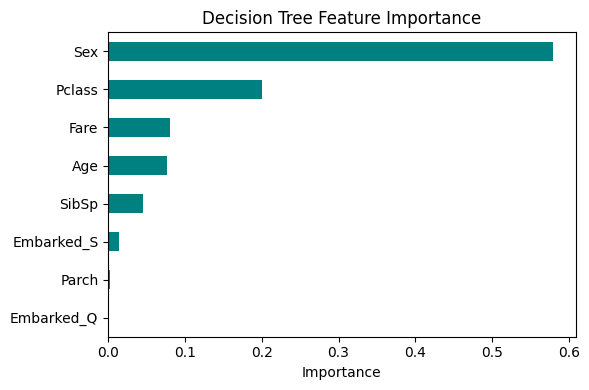

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Plot feature importance
imp = pd.Series(dt.feature_importances_, index=X.columns).sort_values()
plt.figure(figsize=(6, 4))
imp.plot(kind='barh', color='teal')
plt.title("Decision Tree Feature Importance")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


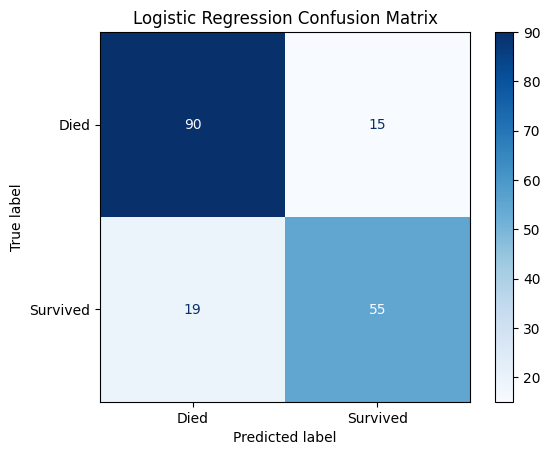

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Logistic Regression confusion matrix
cm = confusion_matrix(y_val, lr_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Died', 'Survived'])
disp.plot(cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()


In [7]:
from sklearn.metrics import accuracy_score

# Predictions
lr_preds = lr.predict(X_val)
dt_preds = dt.predict(X_val)

# Accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_val, lr_preds))
print("Decision Tree Accuracy:", accuracy_score(y_val, dt_preds))


Logistic Regression Accuracy: 0.8100558659217877
Decision Tree Accuracy: 0.7988826815642458


/Users/zoyasood/ashoka-horizons-data-science/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/zoyasood/ashoka-horizons-data-science/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/zoyasood/ashoka-horizons-data-science/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Logistic Regression
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)

# Decision Tree
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)


/Users/zoyasood/ashoka-horizons-data-science/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/zoyasood/ashoka-horizons-data-science/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/zoyasood/ashoka-horizons-data-science/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/zoyasood/ashoka-horizons-data-science/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/zoyasood/ashoka-horizons-data-science/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_los

DecisionTreeClassifier(max_depth=4, random_state=42)

In [5]:
from sklearn.model_selection import train_test_split

# 80% train, 20% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Select features for training
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
X = df[features]
y = df['Survived']  # This is what we want to predict


In [3]:
# Fill missing Age values with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked values with most common (mode)
df['Embarked'].fillna('S', inplace=True)

# Drop unused columns
df = df.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'])

# Convert Sex to binary (male: 0, female: 1)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode Embarked
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# View result
df.head()


/var/folders/v8/rrlcrx6j6sj_y15r15t4515r0000gn/T/ipykernel_17165/1661096711.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/var/folders/v8/rrlcrx6j6sj_y15r15t4515r0000gn/T/ipykernel_17165/1661096711.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


Matplotlib is building the font cache; this may take a moment.


# Capstone Project: Predicting Titanic Survival
**Zoya Sood**  


In [2]:
df = pd.read_csv('../data/train.csv')  
